# SAN JOSE

##  **I.Introduction**

>I am currently a Master student majoring in System Analytic - Industrial Engineering. Next year will be my final year at school and I want to prepare for my next chapter in my life. I have asked myself as well as my friends "Where will be the next place?" , the place that I can easily get familiar with job market, cultural, people and lifestyle. And finally, I found that California is satisfied all of my requirements so that this project I want to analyze and have some insight about this state. 

> ### Why do I chose California ?
> * First of all, California is popular for the dream place for Engineer jobs. A lot of tech companies are placing in California so that I can have more choices in the future.
> * Secondly, the weather in California is similar to my country , it is not as cold as the East Coast of the US so that I can fell comfortable all the time.
> * Finally, cultural diversity has play an important role for my decison and I think that working in that environment, I can learn not only in work but also in many different aspects of lifestyle. 

## **II. Methodology**

 **1.Data Preparation**
>> I used several websites to collect data about demographic, neighborhoods for this project such as **[San Jose,California](https://en.wikipedia.org/wiki/San_Jose,_California#cite_note-San_Jose_Weatherbox_NOAA_txt-93)**, **[California Demographic](https://worldpopulationreview.com/states/california-population)** . Moreover, I used **[Google Maps](https://www.google.com/maps)** and **[Foursquare](https://foursquare.com/)** to collect the latitude and longitude for my data. 

 **2.Data Analysis**

>>* I will make graphs about California and San Jose demographics to compare and have comments the pros and cons of living in this area. 
>>* Then I will choose the suitable Neighborhood for myself, breakdown it and have the further analysis. 

## **III. Data Analysis**

In [1]:
import pandas as pd # for data processing
import folium   #for creating maps
import requests  #for retreiving Information from URL
from geopy.geocoders import Nominatim  #converting address to cordinates
from pandas.io.json import json_normalize #converting json to DataFrame 
import numpy as np
from sklearn.cluster import KMeans
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

> **1.Comparison of county**

In [2]:
df2 = pd.read_excel('C:\\Users\\TRUNG HOANG\\Desktop\\San Jose.xlsx','California Population')
df2.columns = ['County','Population','GrowthRate','Density']
df2.sort_values(by='Population',ascending=False,ignore_index=True)
df2.head()

,County,Population,GrowthRate,Density
0,Los Angeles,9969510,1.4889,13488.8513
1,San Diego,3347270,7.8648,4528.8913
2,Orange,3175130,5.3052,4295.9841
3,Riverside,2520060,14.4660,3409.6675
4,San Bernardino,2206750,8.1290,2985.7558


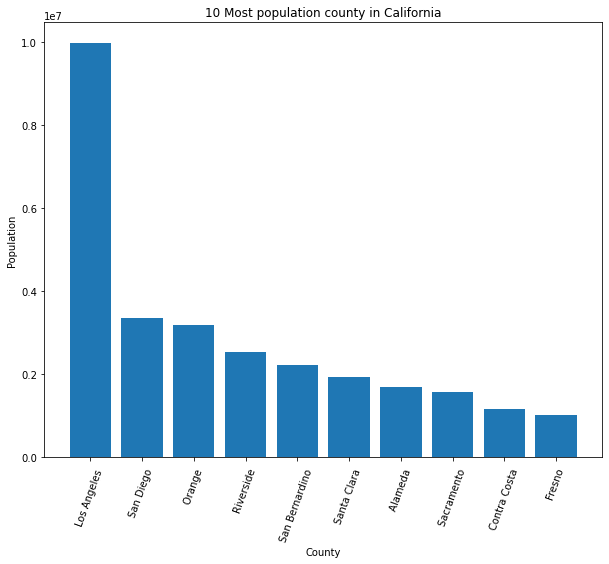

In [3]:
df2_chart=df2.head(10)
fig = plt.figure(figsize = (10, 8))
county = df2_chart['County'].values

plt.bar(county,df2_chart['Population'])
plt.xlabel("County")
plt.xticks(rotation=70)
plt.ylabel("Population")
plt.title("10 Most population county in California")

plt.show()

> **2.Comparison of San Jose**

In [4]:
df1 = pd.read_excel('C:\\Users\\TRUNG HOANG\\Desktop\\San Jose.xlsx','San Jose')
df1_grouped = df1.groupby(['Region','Neighborhood'])
df1_grouped.first()

Latitude   Longitude
Region           Neighborhood                                
Central San Jose Chinatowns             37.333300 -121.900000
                 Downtown San Jose      37.332000 -121.890000
                 Japan Town             37.348630 -121.895421
                 Midtown San Jose       37.324722 -121.910278
                 Naglee Park            37.337790  121.874760
                 North San Pedro        37.339550 -121.896174
                 Northside              37.351998 -121.884291
                 Rose Garden            37.331982 -121.928144
                 San Pedro Square       37.336810 -121.894150
                 SoFA District          37.330861 -121.885910
                 Spartan Keyes          37.321526 -121.875008
                 Tamien                 37.312171 -121.882585
                 The Alameda            37.332230 -121.906287
                 West San Carlos        37.323630 -121.909420
East San Jose    East Foothills         37.383889 -121.822500
                 King and Story         37.339814 -121.844313
                 Little Portugal        37.354410 -121.861810
                 Little Saigon          37.332060 -121.855200
                 Mayfair                37.351686 -121.843315
                 Meadowfair             37.318650 -121.818770
                 Silver Creek Valley    37.289650 -121.782230
North San Jose   Alviso                 37.425000 -121.966667
                 Berryessa              37.386329 -121.860510
                 Rincon South           37.367067 -121.913803
                 Rincon de los Esteros  37.389650 -121.930240
South San Jose   Almaden Valley         37.221400 -121.862200
                 Blossom Valley         37.239140 -121.937480
                 Communications Hill    37.289000 -121.855100
                 Edenvale               37.266084 -121.820136
                 Santa Teresa           37.227948 -121.778641
                 Seven Trees            37.287778 -121.837778
West San Jose    Burbank                37.320556 -121.931667
                 Cambrian               37.255556 -121.928889
                 Fruitdale              37.312778 -121.935833
                 Santana Row            37.320278 -121.947778
                 West Valley            37.291500 -121.988600
                 Willow Glen            37.303570 -121.897345

There are several regions in San Jose and I decided to take a look at East San Jose because there is a small neighborhood call Little Saigon which is similar to my culture. 

In [5]:
df = pd.read_excel('C:\\Users\\TRUNG HOANG\\Desktop\\San Jose.xlsx','East SJ')
df

,Region,Neighborhood,Latitude,Longitude
0,East San Jose,Mayfair,37.351686,-121.843315
1,East San Jose,King and Story,37.339814,-121.844313
2,East San Jose,East Foothills,37.383889,-121.822500
3,East San Jose,Meadowfair,37.318650,-121.818770
4,East San Jose,Silver Creek Valley,37.289650,-121.782230
5,East San Jose,Little Portugal,37.354410,-121.861810
6,East San Jose,Little Saigon,37.332060,-121.855200


In [6]:
CLIENT_ID = 'ZJFUOG3KH25RM35JAFRKX4EF115JOREL25SWQV5R3KAALBQ4' # your Foursquare ID
CLIENT_SECRET = '12CIFGXYFN0LEF4DAVGAYYPXYWCM0WIRJQAOPLKJ41LSQE4I' # your Foursquare Secret
ACCESS_TOKEN = 'BZHHTBH2MV5XJTY24L3FJ2UWIK30P2Z2XSK5OPVD0IIGDGWA' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZJFUOG3KH25RM35JAFRKX4EF115JOREL25SWQV5R3KAALBQ4
CLIENT_SECRET:12CIFGXYFN0LEF4DAVGAYYPXYWCM0WIRJQAOPLKJ41LSQE4I


In [7]:
# reading address from user
address = 'East San Jose, California'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
#converting address to coordinates
# reading latitude from location
latitude = location.latitude
# reading longitude from location
longitude = location.longitude
print(latitude,longitude)

37.326535 -121.8108454


In [8]:
# reading radius from user
#radius = input("Enter the radius for searching : ")
#reading search limit from user
#Limit = input("enter the Limit for Results to display : ")
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
results = requests.get(url).json()

In [9]:
items = results['response']['groups'][0]['items']

> **4.Get some nearby places**

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = json_normalize(items) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
nearby = dataframe.loc[:, filtered_columns]

# filter the category for each row
nearby['venue.categories'] = nearby.apply(get_category_type, axis=1)

# clean columns
nearby.columns = [col.split('.')[-1] for col in nearby.columns]

#replce NaN values with Not found in address
nearby['address'] = nearby['address'].fillna("Not found")
nearby.head(10)
nearby.shape


<ipython-input-10-b3648c6a866f>:13: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(items)


(50, 16)

In [11]:
nearby.head(10)

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,24 Hour Fitness,Gym / Fitness Center,2200 Eastridge Loop,37.325032,-121.813462,"[{'label': 'display', 'lat': 37.3250317801661,...",285,95122,US,San Jose,CA,United States,"[2200 Eastridge Loop, San Jose, CA 95122, Unit...",NaN,NaN,5517134e498e4a598e223209
1,Victoria's Secret PINK,Lingerie Store,2200 Eastridge Loop,37.325612,-121.813359,"[{'label': 'display', 'lat': 37.32561220871705...",245,95122,US,San Jose,CA,United States,"[2200 Eastridge Loop, San Jose, CA 95122, Unit...",NaN,NaN,4c1a7067b4e62d7f60cfd793
2,In-N-Out Burger,Fast Food Restaurant,2950 E Capitol Exwy,37.330163,-121.811432,"[{'label': 'display', 'lat': 37.33016339401407...",407,95148,US,San Jose,CA,United States,"[2950 E Capitol Exwy (at Tully Rd), San Jose, ...",at Tully Rd,NaN,4a1b276df964a520d47a1fe3
3,Bowling & Amusement ROUND 1,Arcade,EastRIDGE MALL,37.324903,-121.813642,"[{'label': 'display', 'lat': 37.3249034784296,...",307,95122,US,San Jose,CA,United States,"[EastRIDGE MALL, San Jose, CA 95122, United St...",NaN,East San Jose,55e0d040498e894f3cf8594b
4,AMC Eastridge 15,Movie Theater,2190 Eastridge Loop,37.326949,-121.813188,"[{'label': 'display', 'lat': 37.32694931281627...",212,95122,US,San Jose,CA,United States,"[2190 Eastridge Loop, San Jose, CA 95122, Unit...",NaN,NaN,4b10de98f964a5205e7623e3
5,Vans,Shoe Store,"2200 Eastridge Loop, Space 2083",37.325520,-121.813373,"[{'label': 'display', 'lat': 37.32552, 'lng': ...",250,95122,US,San Jose,CA,United States,"[2200 Eastridge Loop, Space 2083, San Jose, CA...",NaN,NaN,4b54d591f964a520d8ce27e3
6,Zumiez,Clothing Store,1 Eastridge Mall,37.325690,-121.813763,"[{'label': 'display', 'lat': 37.32569, 'lng': ...",274,95122,US,San Jose,CA,United States,"[1 Eastridge Mall (Suite 245), San Jose, CA 95...",Suite 245,NaN,4bb25a9f715eef3bfe1d85bb
7,Hot Topic,Clothing Store,Eastridge Loop,37.325408,-121.813607,"[{'label': 'display', 'lat': 37.32540782696348...",274,95122-1413,US,San Jose,CA,United States,"[Eastridge Loop, San Jose, CA 95122-1413, Unit...",NaN,NaN,4b3ee1c8f964a520dfa225e3
8,Sprint Store,Mobile Phone Shop,"2200 Eastridge Loop, Ste 2054",37.325909,-121.813523,"[{'label': 'display', 'lat': 37.325909396869, ...",247,95122,US,San Jose,CA,United States,"[2200 Eastridge Loop, Ste 2054, San Jose, CA 9...",NaN,NaN,4bdc9e1bafe8c9b634425085
9,Olive Garden,Italian Restaurant,2226 Eastridge Loop,37.325744,-121.810757,"[{'label': 'display', 'lat': 37.32574439098976...",88,95122,US,San Jose,CA,United States,"[2226 Eastridge Loop (Capitol Expressway), San...",Capitol Expressway,NaN,52755798498e5a70a68bf696


In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
from pandas.io.json import json_normalize
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-13-04b8cafc50e9>:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,24 Hour Fitness,Gym / Fitness Center,37.325032,-121.813462
1,Victoria's Secret PINK,Lingerie Store,37.325612,-121.813359
2,In-N-Out Burger,Fast Food Restaurant,37.330163,-121.811432
3,Bowling & Amusement ROUND 1,Arcade,37.324903,-121.813642
4,AMC Eastridge 15,Movie Theater,37.326949,-121.813188


In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
SanJose_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Mayfair
King and Story
East Foothills
Meadowfair
Silver Creek Valley
Little Portugal
Little Saigon


In [16]:
print(SanJose_venues.shape)
SanJose_venues.head()

(223, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mayfair,37.351686,-121.843315,A Bite Of Wyoming,37.357926,-121.845389,Breakfast Spot
1,Mayfair,37.351686,-121.843315,El Pirrin,37.351814,-121.848226,Mexican Restaurant
2,Mayfair,37.351686,-121.843315,Jalisco Taqueria,37.345237,-121.848760,Mexican Restaurant
3,Mayfair,37.351686,-121.843315,La Costa,37.353959,-121.853640,Mexican Restaurant
4,Mayfair,37.351686,-121.843315,Pink Elephant Bakery,37.345087,-121.848510,Bakery


In [17]:
SanJose_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
East Foothills,13,13,13,13,13,13
King and Story,38,38,38,38,38,38
Little Portugal,38,38,38,38,38,38
Little Saigon,50,50,50,50,50,50
Mayfair,23,23,23,23,23,23
Meadowfair,50,50,50,50,50,50
Silver Creek Valley,11,11,11,11,11,11


In [18]:
# Analyze each neighborhood
# one hot encoding
SJ_onehot = pd.get_dummies(SanJose_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SJ_onehot['Neighborhood'] = SanJose_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [SJ_onehot.columns[-1]] + list(SJ_onehot.columns[:-1])
SJ_onehot = SJ_onehot[fixed_columns]

SJ_onehot.head()

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Auto Garage,Bakery,Bank,...,Thai Restaurant,Theme Park Ride / Attraction,Track,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Zoo
0,Mayfair,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mayfair,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Mayfair,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mayfair,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Mayfair,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Group neighbor by mean of category
SJ_grouped = SJ_onehot.groupby('Neighborhood').mean().reset_index()
SJ_grouped

,Neighborhood,Accessories Store,Advertising Agency,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Auto Garage,Bakery,Bank,...,Thai Restaurant,Theme Park Ride / Attraction,Track,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wings Joint,Women's Store,Zoo
0,East Foothills,0.00,0.076923,0.076923,0.00,0.00,0.00,0.076923,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.076923,0.000000,0.000000,0.00,0.00
1,King and Story,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.026316,0.052632,...,0.00,0.00,0.000000,0.00,0.026316,0.026316,0.000000,0.026316,0.00,0.00
2,Little Portugal,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.026316,0.000000,...,0.00,0.00,0.026316,0.00,0.000000,0.026316,0.078947,0.000000,0.00,0.00
3,Little Saigon,0.00,0.000000,0.020000,0.00,0.00,0.04,0.000000,0.040000,0.000000,...,0.02,0.02,0.000000,0.02,0.000000,0.020000,0.260000,0.000000,0.00,0.02
4,Mayfair,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.043478,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.043478,0.000000,0.00,0.00
5,Meadowfair,0.02,0.000000,0.000000,0.02,0.02,0.00,0.000000,0.020000,0.000000,...,0.00,0.00,0.000000,0.00,0.020000,0.020000,0.140000,0.000000,0.02,0.00
6,Silver Creek Valley,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00


> **5.Each neighbor with top 5 most common places**

In [20]:
num_top_venues = 5

for hood in SJ_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = SJ_grouped[SJ_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----East Foothills----
                        venue  freq
0                Liquor Store  0.15
1                 Golf Course  0.08
2          Mexican Restaurant  0.08
3  Construction & Landscaping  0.08
4        Fast Food Restaurant  0.08


----King and Story----
                venue  freq
0  Mexican Restaurant  0.13
1   Mobile Phone Shop  0.08
2         Coffee Shop  0.05
3                Bank  0.05
4        Intersection  0.03


----Little Portugal----
                   venue  freq
0     Mexican Restaurant  0.18
1      Convenience Store  0.13
2  Vietnamese Restaurant  0.08
3  Portuguese Restaurant  0.05
4            Gas Station  0.03


----Little Saigon----
                   venue  freq
0  Vietnamese Restaurant  0.26
1           Dessert Shop  0.08
2         Sandwich Place  0.04
3        Bubble Tea Shop  0.04
4         Ice Cream Shop  0.04


----Mayfair----
                venue  freq
0  Mexican Restaurant  0.30
1        Intersection  0.04
2      Breakfast Spot  0.04
3               

In [21]:
#function to sort the venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [22]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = SJ_grouped['Neighborhood']

for ind in np.arange(SJ_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SJ_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Foothills,Liquor Store,Golf Course,Mexican Restaurant,Construction & Landscaping,Fast Food Restaurant,Supermarket,Pharmacy,Deli / Bodega,Video Store,American Restaurant
1,King and Story,Mexican Restaurant,Mobile Phone Shop,Coffee Shop,Bank,Intersection,Grocery Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Gym / Fitness Center
2,Little Portugal,Mexican Restaurant,Convenience Store,Vietnamese Restaurant,Portuguese Restaurant,Gas Station,Sushi Restaurant,Event Space,Fast Food Restaurant,Sandwich Place,Fried Chicken Joint
3,Little Saigon,Vietnamese Restaurant,Dessert Shop,Sandwich Place,Bubble Tea Shop,Ice Cream Shop,Bakery,Chinese Restaurant,Asian Restaurant,Pet Store,Tea Room
4,Mayfair,Mexican Restaurant,Intersection,Breakfast Spot,Farm,Print Shop,Food Truck,Fried Chicken Joint,Chinese Restaurant,Check Cashing Service,Playground


## Perform Clustering

In [23]:
#Run k-means to cluster the neighborhood into 5 clusters

# set number of clusters
kclusters = 5

SJ_grouped_clustering = SJ_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(SJ_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

<ipython-input-23-f24ac221459a>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  SJ_grouped_clustering = SJ_grouped.drop('Neighborhood', 1)


array([3, 2, 2, 0, 1, 0, 4])

In [24]:
#create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

SJ_merged = df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SJ_merged = SJ_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

SJ_merged.head() 

,Region,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East San Jose,Mayfair,37.351686,-121.843315,1,Mexican Restaurant,Intersection,Breakfast Spot,Farm,Print Shop,Food Truck,Fried Chicken Joint,Chinese Restaurant,Check Cashing Service,Playground
1,East San Jose,King and Story,37.339814,-121.844313,2,Mexican Restaurant,Mobile Phone Shop,Coffee Shop,Bank,Intersection,Grocery Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Gym / Fitness Center
2,East San Jose,East Foothills,37.383889,-121.822500,3,Liquor Store,Golf Course,Mexican Restaurant,Construction & Landscaping,Fast Food Restaurant,Supermarket,Pharmacy,Deli / Bodega,Video Store,American Restaurant
3,East San Jose,Meadowfair,37.318650,-121.818770,0,Clothing Store,Vietnamese Restaurant,Bubble Tea Shop,Coffee Shop,Mobile Phone Shop,Shoe Store,Lingerie Store,Cosmetics Shop,Supplement Shop,Convenience Store
4,East San Jose,Silver Creek Valley,37.289650,-121.782230,4,Mexican Restaurant,Shipping Store,Pizza Place,Japanese Restaurant,Shopping Mall,Coffee Shop,Gym,Grocery Store,Golf Course,Clothing Store


In [25]:
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
#visualize the resulting clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SJ_merged['Latitude'], SJ_merged['Longitude'], SJ_merged['Neighborhood'], SJ_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)],
        fill=True,
        fill_color=rainbow[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [26]:
#Cluster1
SJ_merged.loc[SJ_merged['Cluster Labels'] == 0, SJ_merged.columns[[0] + list(range(4, SJ_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,East San Jose,0,Clothing Store,Vietnamese Restaurant,Bubble Tea Shop,Coffee Shop,Mobile Phone Shop,Shoe Store,Lingerie Store,Cosmetics Shop,Supplement Shop,Convenience Store
6,East San Jose,0,Vietnamese Restaurant,Dessert Shop,Sandwich Place,Bubble Tea Shop,Ice Cream Shop,Bakery,Chinese Restaurant,Asian Restaurant,Pet Store,Tea Room


In [27]:
#Cluster2
SJ_merged.loc[SJ_merged['Cluster Labels'] == 1, SJ_merged.columns[[0] + list(range(4, SJ_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East San Jose,1,Mexican Restaurant,Intersection,Breakfast Spot,Farm,Print Shop,Food Truck,Fried Chicken Joint,Chinese Restaurant,Check Cashing Service,Playground


In [28]:
#Cluster3
SJ_merged.loc[SJ_merged['Cluster Labels'] == 2, SJ_merged.columns[[0] + list(range(4, SJ_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,East San Jose,2,Mexican Restaurant,Mobile Phone Shop,Coffee Shop,Bank,Intersection,Grocery Store,Construction & Landscaping,Convenience Store,Cosmetics Shop,Gym / Fitness Center
5,East San Jose,2,Mexican Restaurant,Convenience Store,Vietnamese Restaurant,Portuguese Restaurant,Gas Station,Sushi Restaurant,Event Space,Fast Food Restaurant,Sandwich Place,Fried Chicken Joint


In [29]:
#Cluster 4
SJ_merged.loc[SJ_merged['Cluster Labels'] == 3, SJ_merged.columns[[0] + list(range(4, SJ_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,East San Jose,3,Liquor Store,Golf Course,Mexican Restaurant,Construction & Landscaping,Fast Food Restaurant,Supermarket,Pharmacy,Deli / Bodega,Video Store,American Restaurant


In [30]:
#Cluster 5
SJ_merged.loc[SJ_merged['Cluster Labels'] == 4, SJ_merged.columns[[0] + list(range(4, SJ_merged.shape[1]))]]

,Region,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,East San Jose,4,Mexican Restaurant,Shipping Store,Pizza Place,Japanese Restaurant,Shopping Mall,Coffee Shop,Gym,Grocery Store,Golf Course,Clothing Store


## **IV. Conclusion**

After clustering common venues, we observed that Mexican restaurants are very popular in East San Jose. In my opinion, I think that, Meadowfair and Little Saigon neighborhoods are suitable for me because I love Vietmanese food. Moreover, looking at the common venues of these areas, I can describe these neighborhoods are Asian Town because a lot of Asian food are place there such as : Bubble Tea shop, Asian Restaurant or Coffee shop.